In [47]:
import os
import datetime
import numpy as np
import pickle
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

In [48]:
#csv_path = r"D:\01 Files\04 University\00 Internships and theses\2. AI internship\results\shape vs texture bias\texture_bias_regression_results.csv"
#dataset = "OADS"

csv_path = r"D:\01 Files\04 University\00 Internships and theses\2. AI internship\results\shape vs texture bias\imagenet_texture_results.csv"
dataset = "ImageNet-16"

In [49]:
# Read the csv
df = pd.read_csv(csv_path)

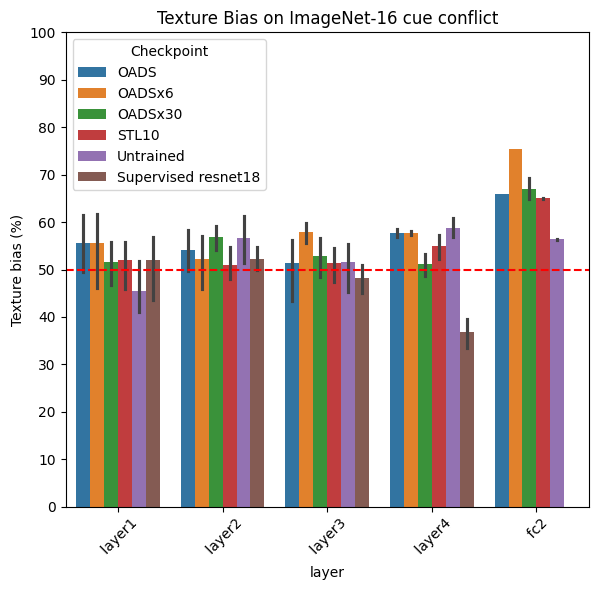

In [26]:
title = f"Texture Bias on {dataset} cue conflict"

# Plot
plt.figure(figsize=(6, 6))
g= sns.barplot(data=df, x="layer", y="texture_bias", hue="checkpoint", dodge=True) #palette="pastel",
#sns.barplot(data=df, x="layer", y="shape_bias", hue="checkpoint", palette="dark", dodge=True, bottom=df["texture_bias"])
plt.title(title)
plt.ylabel("Texture bias (%)")
#plt.xlabel("Layer")
plt.legend(title="Checkpoint")
plt.xticks(rotation=45)
plt.tight_layout()

plt.ylim(0, 100)
plt.axhline(y=50, color='r', linestyle='--')
g.set_yticks(range(0,101,10)) 


plt.show()


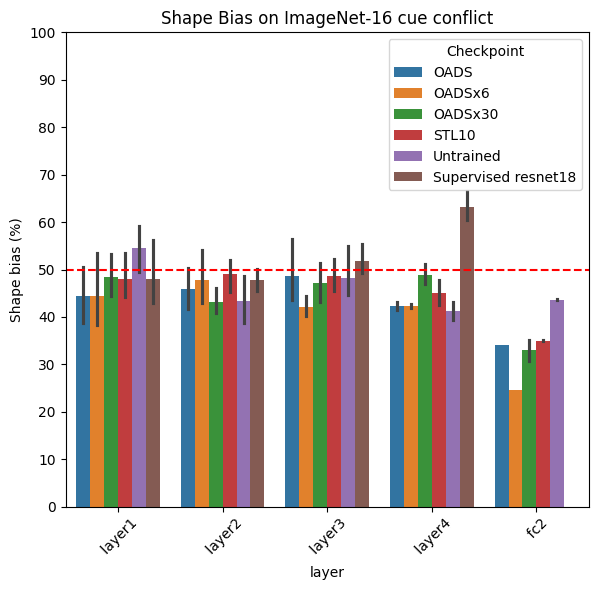

In [27]:
title = f"Shape Bias on {dataset} cue conflict"

# Plot
plt.figure(figsize=(6, 6))
g= sns.barplot(data=df, x="layer", y="shape_bias", hue="checkpoint", dodge=True) #palette="pastel",
#sns.barplot(data=df, x="layer", y="shape_bias", hue="checkpoint", palette="dark", dodge=True, bottom=df["texture_bias"])
plt.title(title)
plt.ylabel("Shape bias (%)")
#plt.xlabel("Layer")
plt.legend(title="Checkpoint")
plt.xticks(rotation=45)
plt.tight_layout()

plt.ylim(0, 100)
plt.axhline(y=50, color='r', linestyle='--')
g.set_yticks(range(0,101,10)) 


plt.show()


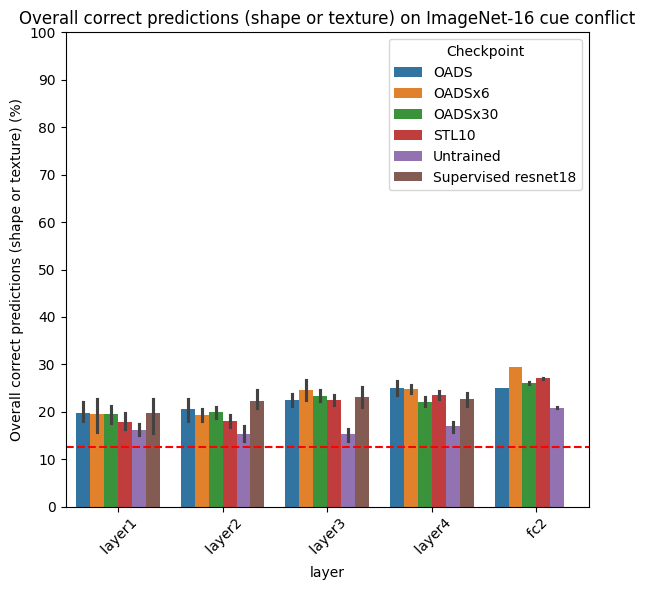

In [42]:
title = f"Overall correct predictions (shape or texture) on {dataset} cue conflict"

# Plot
plt.figure(figsize=(6, 6))
g= sns.barplot(data=df, x="layer", y="overall_correct", hue="checkpoint", dodge=True) #palette="pastel",
#sns.barplot(data=df, x="layer", y="shape_bias", hue="checkpoint", palette="dark", dodge=True, bottom=df["texture_bias"])
plt.title(title)
plt.ylabel("Overall correct predictions (shape or texture) (%)")
#plt.xlabel("Layer")
plt.legend(title="Checkpoint")
plt.xticks(rotation=45)
plt.tight_layout()

plt.ylim(0, 100)
plt.axhline(y=12.5, color='r', linestyle='--')
g.set_yticks(range(0,101,10)) 


plt.show()


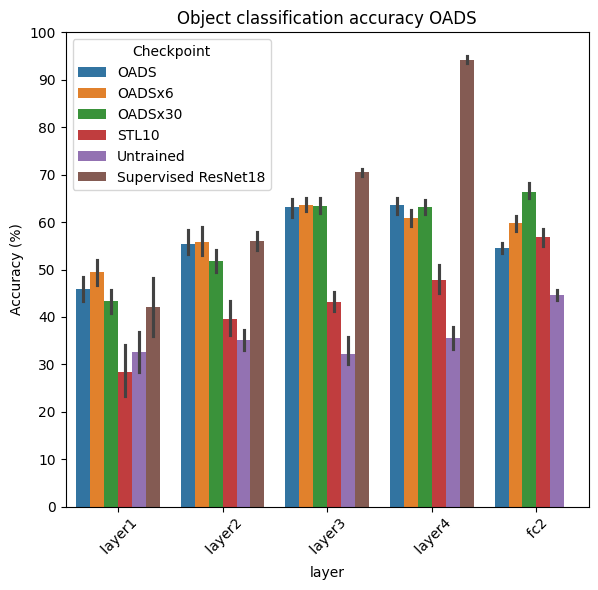

In [50]:
# Same but for object classification

#csv_path_oc = r"D:\01 Files\04 University\00 Internships and theses\2. AI internship\results\imagenet_obj_class_accuracies.csv"
#dataset_oc = "ImageNet-16"

csv_path_oc = r"D:\01 Files\04 University\00 Internships and theses\2. AI internship\results\object_reg_accuracies.csv"
dataset_oc = "OADS"

# Read the csv
df_oc = pd.read_csv(csv_path_oc)



title = f"Object classification accuracy {dataset_oc}"

# Plot
plt.figure(figsize=(6, 6))
g= sns.barplot(data=df_oc, x="layer", y="accuracy", hue="checkpoint", dodge=True) #palette="pastel",
#sns.barplot(data=df, x="layer", y="shape_bias", hue="checkpoint", palette="dark", dodge=True, bottom=df["texture_bias"])
plt.title(title)
plt.ylabel("Accuracy (%)")
#plt.xlabel("Layer")
plt.legend(title="Checkpoint")
plt.xticks(rotation=45)
plt.tight_layout()

plt.ylim(0, 100)
#plt.axhline(y=6.25, color='r', linestyle='--')
g.set_yticks(range(0,101,10)) 


plt.show()